# **Assignment 2 Part 2**

Expected Time to complete: 4-5 hours

# **Submission Intructions**

There are two parts of this assignment. You should name both notebooks as YourRollNumber_PartNumber.ipynb. (e.g. this part should be named as 2XXXXXXX_2.ipynb)
You must submit a zip file containg just two notebooks and it must not has any folder or any other file.
The name of the zip file must be your Roll Number


The following part is regarding QS University rankings over the past three years. Data has been scraped from https://www.topuniversities.com/university-rankings/world-university-rankings/2021 and converted into a .csv file. 

* **Note that for ALL plotting questions from here on out, we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is 'enough' -> If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?**


# **Load Relevant Libraries**

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [248]:
# Do not change this cell

df_2019 = pd.read_csv('2019.csv', encoding='latin-1')
df_2020 = pd.read_csv('i980-=', encoding='latin-1')
df_2021 = pd.read_csv('2021.csv', encoding='latin-1')

FileNotFoundError: [Errno 2] No such file or directory: 'i980-='

In [249]:
# Standardizing the column names
df_2019.columns = df_2019.columns.str.lower()
df_2020.columns = df_2019.columns.str.lower()
df_2021.columns = df_2019.columns.str.lower()

# Restructuring the column indexes
df_2019 = df_2019[['rank', 'university', 'region', 'academic reputation', 'employer reputation', 'faculty student', 'international faculty','international students', 'citations per faculty', 'overall score'] ]
df_2020 = df_2020[['rank', 'university', 'region', 'academic reputation', 'employer reputation', 'faculty student', 'international faculty','international students', 'citations per faculty', 'overall score'] ]
df_2021 = df_2021[['rank', 'university', 'region', 'academic reputation', 'employer reputation', 'faculty student', 'international faculty','international students', 'citations per faculty', 'overall score'] ]


ValueError: Length mismatch: Expected axis has 11 elements, new values have 10 elements

Let's check a few rows from each dataframe

In [250]:
df_2019.head(10)

,rank,university,overall score,academic reputation,employer reputation,faculty student,international faculty,international students,citations per faculty,region
0,1,Massachusetts Institute of Technology (MIT),100.0,100.0,100.0,100.0,100.0,95.5,99.8,USA
1,2,Stanford University,98.6,100.0,100.0,100.0,99.8,70.5,99.0,USA
2,3,Harvard University,98.5,100.0,100.0,99.3,92.1,75.7,99.8,USA
3,4,California Institute of Technology (Caltech),97.2,98.7,81.2,100.0,96.8,90.3,100.0,USA
4,5,University of Oxford,96.8,100.0,100.0,100.0,99.6,98.8,83.0,UK
5,6,University of Cambridge,95.6,100.0,100.0,100.0,99.4,97.9,77.2,UK
6,7,ETH Zurich - Swiss Federal Institute of Techno...,95.3,98.2,96.2,82.4,100.0,98.6,98.7,Switzerand
7,8,Imperial College London,93.3,98.7,99.9,99.9,100.0,100.0,67.8,UK
8,9,University of Chicago,93.2,99.6,90.7,97.4,74.2,82.5,83.6,USA
9,10,UCL,92.9,99.3,99.2,99.2,98.7,100.0,66.2,UK


In [251]:
df_2020.head(10)

,rank,university,region,academic reputation,employer reputation,faculty student,international faculty,international students,citations per faculty,overall score,year
0,1,Massachusetts Institute of Technology (MIT),USA,99.8,94.1,100.0,100.0,100.0,100.0,100.0,2020
1,2,Stanford University,USA,98.6,67.7,99.8,100.0,100.0,100.0,98.4,2020
2,3,Harvard University,USA,99.6,62.2,86.3,98.7,100.0,100.0,97.4,2020
3,4,University of Oxford,UK,84.7,98.5,99.7,100.0,100.0,100.0,97.2,2020
4,5,California Institute of Technology (Caltech),USA,100.0,87.3,99.4,100.0,81.2,97.8,96.9,2020
5,6,ETH Zurich - Swiss Federal Institute of Techno...,Switzerland,98.4,98.0,100.0,85.0,96.7,98.4,95.9,2020
6,7,University of Cambridge,UK,74.2,97.6,100.0,100.0,100.0,100.0,95.0,2020
7,8,UCL,UK,76.7,100.0,99.1,98.1,98.7,99.3,94.8,2020
8,9,Imperial College London,UK,72.1,100.0,100.0,99.8,99.9,98.6,94.1,2020
9,10,University of Chicago,USA,78.5,81.0,70.2,96.5,93.7,99.5,92.0,2020


In [252]:
df_2021.head(10)

,rank,university,region,academic reputation,employer reputation,faculty student,international faculty,international students,citations per faculty,overall score,year
0,1,Massachusetts Institute of Technology (MIT),USA,99.8,94.1,100.0,100.0,100.0,100.0,100.0,2021
1,2,Stanford University,USA,98.6,67.7,99.8,100.0,100.0,100.0,98.4,2021
2,3,Harvard University,USA,99.6,62.2,86.3,98.7,100.0,100.0,97.4,2021
3,4,University of Oxford,UK,84.7,98.5,99.7,100.0,100.0,100.0,97.2,2021
4,5,California Institute of Technology (Caltech),USA,100.0,87.3,99.4,100.0,81.2,97.8,96.9,2021
5,6,ETH Zurich - Swiss Federal Institute of Techno...,Switzerland,98.4,98.0,100.0,85.0,96.7,98.4,95.9,2021
6,7,University of Cambridge,UK,74.2,97.6,100.0,100.0,100.0,100.0,95.0,2021
7,8,UCL,UK,76.7,100.0,99.1,98.1,98.7,99.3,94.8,2021
8,9,Imperial College London,UK,72.1,100.0,100.0,99.8,99.9,98.6,94.1,2021
9,10,University of Chicago,USA,78.5,81.0,70.2,96.5,93.7,99.5,92.0,2021


Let's also see where we stand in terms of Null values and data types

In [255]:
df_2019.info()
df_2020.info()
df_2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rank                    100 non-null    int64  
 1   university              100 non-null    object 
 2   overall score           100 non-null    float64
 3   academic reputation     100 non-null    float64
 4   employer reputation     100 non-null    float64
 5   faculty student         100 non-null    float64
 6   international faculty   100 non-null    float64
 7   international students  100 non-null    float64
 8   citations per faculty   100 non-null    float64
 9   region                  100 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  ------------

So, all good!

Notice that there is no 'year' column in any of the dataframe. As your first task, append an appropriate 'year' column in each dataframe.

**Q1.** Append a column 'year' in each dataframe. It must correspond to the year for which the data is represented. (3)

In [256]:
# Enter Code here
df_2019["year"]=2019
df_2020["year"]=2020
df_2021["year"]=2021



**Q2.** Next, find the count of universities in each region that made it to the Top 100 each year. Print all of them in the same cell. (3)
<br> Do you notice some trend? Comment on what you observe and why might that be consistent throughout the years. (1)

In [257]:
# Enter Code here
reg_2019 =  df_2019.groupby('region')['region'].count()
reg_2020 =  df_2020.groupby('region')['region'].count()
reg_2021 =  df_2021.groupby('region')['region'].count()
all_reg={'2019': reg_2019, '2020': reg_2020,'2021':reg_2021}
df = pd.DataFrame(data=all_reg)
print(df)
#print(reg_2019)


             2019  2020  2021
Argentina     1.0   1.0   1.0
Australia     6.0   7.0   7.0
Belgium       1.0   1.0   1.0
Canada        2.0   2.0   2.0
China        11.0  11.0  11.0
Denmark       1.0   1.0   1.0
France        3.0   2.0   2.0
Germany       3.0   3.0   4.0
Japan         5.0   5.0   5.0
Malaysia      1.0   1.0   1.0
Netherlands   4.0   2.0   2.0
New Zealand   1.0   1.0   1.0
Russia        1.0   1.0   1.0
Scotland      1.0   NaN   NaN
Singapore     2.0   2.0   2.0
South Korea   4.0   5.0   5.0
Sweden        1.0   2.0   2.0
Switzerand    3.0   NaN   NaN
Switzerland   NaN   4.0   4.0
Taiwan        1.0   1.0   1.0
UK           18.0  19.0  18.0
USA          30.0  29.0  29.0


**Q3.** From the data of 2021, find the average score of all attributes for all universities. (2)

In [258]:
df_2021.mean()


rank                        50.420
academic reputation         67.041
employer reputation         67.680
faculty student             73.539
international faculty       70.088
international students      79.092
citations per faculty       82.147
overall score               75.504
year                      2021.000
dtype: float64

**Q4.** From the same data of 2021, now find the average of *each* region for **all** attributes **excluding** 'rank' and 'year'. Store the results in a temporary variable named **average_2021**. (3)

In [259]:
# Enter Code here
average_2021=df_2021.groupby('region')['academic reputation', 'employer reputation','faculty student','international faculty','international students','citations per faculty','overall score'].mean()

average_2021
#display(average_2021)
#average_2021[['academic reputation', 'employer reputation','faculty student','international faculty','international students','citations per faculty','overall score']].mean()

<ipython-input-259-eaae120b606d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_2021=df_2021.groupby('region')['academic reputation', 'employer reputation','faculty student','international faculty','international students','citations per faculty','overall score'].mean()


,academic reputation,employer reputation,faculty student,international faculty,international students,citations per faculty,overall score
region,,,,,,,
Argentina,2.400000,64.700000,50.700000,77.400000,91.300000,87.200000,66.000000
Australia,78.871429,99.485714,99.657143,24.371429,86.485714,89.100000,75.142857
Belgium,85.300000,37.500000,90.000000,11.800000,64.300000,79.100000,64.100000
Canada,51.150000,94.600000,95.700000,67.400000,95.050000,95.550000,81.250000
China,69.545455,58.818182,84.345455,76.618182,72.645455,79.445455,75.681818
Denmark,25.500000,29.400000,92.600000,100.000000,43.900000,70.100000,63.800000
France,31.200000,64.300000,57.450000,79.850000,72.250000,83.450000,69.150000
Germany,39.350000,47.400000,58.025000,80.975000,70.625000,84.775000,70.525000
Japan,54.340000,21.380000,18.600000,90.860000,80.180000,84.700000,73.180000


**Q5.** Sort the average_2021 dataframe from the previous question based on overall score in a descending fashion (top to bottom). (2)

In [260]:
# Enter Code here
average_2021=average_2021.sort_values(by='overall score', ascending=False)
average_2021


,academic reputation,employer reputation,faculty student,international faculty,international students,citations per faculty,overall score
region,,,,,,,
Singapore,82.250000,75.300000,100.000000,91.100000,96.500000,95.950000,91.800000
Canada,51.150000,94.600000,95.700000,67.400000,95.050000,95.550000,81.250000
Switzerland,75.575000,88.825000,98.800000,95.225000,84.525000,69.100000,79.900000
USA,78.448276,66.293103,67.600000,69.093103,79.103448,86.917241,79.141379
UK,63.927778,91.516667,90.577778,70.805556,84.838889,79.688889,76.661111
China,69.545455,58.818182,84.345455,76.618182,72.645455,79.445455,75.681818
Australia,78.871429,99.485714,99.657143,24.371429,86.485714,89.100000,75.142857
Japan,54.340000,21.380000,18.600000,90.860000,80.180000,84.700000,73.180000
Netherlands,82.950000,70.150000,89.400000,45.600000,72.100000,76.150000,71.600000


**Q6.** What do you observe from the table above? Which country tops the ranking? Why did USA go down in the rankings? (3) <br>
Note: This is an open-ended question. Comment on why you think is the reason that USA is not top of the list. 

**Ans.** Write your answer here.
USA consistently got low average marks in employer reputation, faculty student and international faculty rankings which in turn lowered the country's overall score

**Q7.** Represent all the attributes in the average_2021 dataframe using a box and whisker plot. Do you observe any anomalies in any of them? (7+3) <br>
**Note:** They should be in the same cell, but not necessarily in the same figure.<br>
**Hint:** You can do this using subplots (and also otherwise)


<AxesSubplot:>

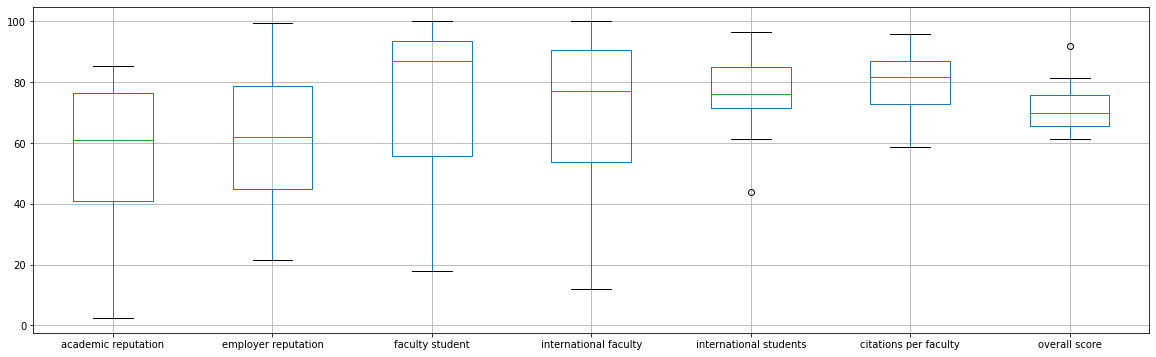

In [261]:
# Enter Code here
#sns.boxplot(x=average_2021['academic reputation'])
# Write about anomalies in comments
#a.empty, a.bool(), a.item(), a.any() or a.all().
average_2021.boxplot(figsize=(20,6))


**Q8.** Represent all the attributes in the average_2021 dataframe using a scatter plot. Do you observe any general trend? (5+2) <br>
**Note:** They should be in the same cell, but not necessarily in the same figure.<br>
**Hint:** Very similar to the previous question

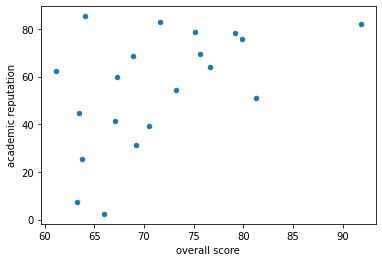

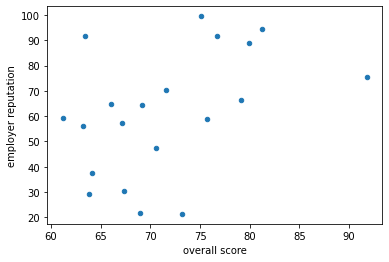

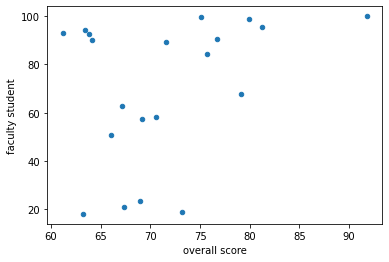

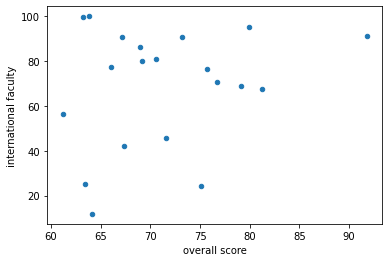

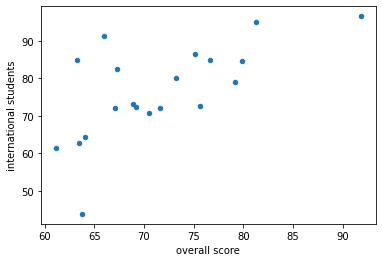

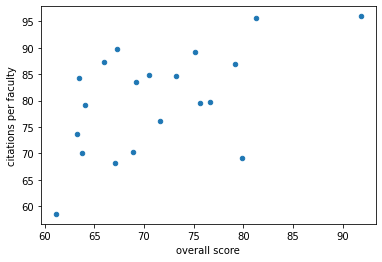

In [262]:
# Enter Code here

#fig = plt.figure()
#fig,ax=plt.subplots(2, figsize=(4, 4))
average_2021.plot.scatter(x='overall score',y='academic reputation')
average_2021.plot.scatter(x='overall score',y='employer reputation')
average_2021.plot.scatter(x='overall score',y='faculty student')
average_2021.plot.scatter(x='overall score',y='international faculty')
average_2021.plot.scatter(x='overall score',y='international students')
average_2021.plot.scatter(x='overall score',y='citations per faculty')

plt.show()
# Write about general trend here


**Q9.** Finally, let's plot the kernel density estimate (KDE) of all the different types of score from the average_2021 data. (5) <br>
**Note:** There should be just one figure having all the plots. Make a suitable legend alongside.

<AxesSubplot:ylabel='Density'>

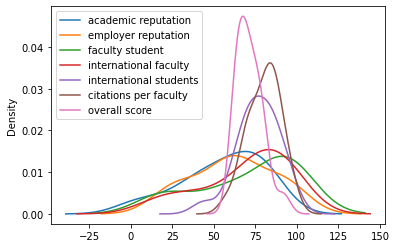

In [263]:
# Enter Code here
average_2021.plot.kde()

So far, so good :) <br> 
We're just wrapping up now

**Let's come to the Top 10 Universities and observe how they performed over the years.** <br><br>
**Q10.** Create a smaller dataframe which has the top ten universities from each year, and only their overall scores across the three years. (5) <br>
Hint: 

*   There will be four columns in the dataframe you make
*   The top ten universities are same across the three years. Only their rankings differ.
*   Use the merge function. You can read more about how to use it in the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
*   Shape of the resultant dataframe should be (10, 4)






In [264]:
# Enter code here
t2019=df_2019[df_2019['rank']<=10]
t2020=df_2020[df_2020['rank']<=10]
t2021=df_2021[df_2021['rank']<=10]
t2021 =t2021[['university','overall score']]      
t2021=t2021.merge(t2020,how='inner',on='university',suffixes=(' 2021', ' 2020'))
t2021=t2021.merge(t2019,how='inner',on='university',suffixes=(' 2020', ' 2019'))
t2021=t2021[['university','overall score 2021','overall score 2020','overall score']]

t2021.shape
#t2021.merge(t2019,how='outer',on='university',suffixes=(' 2021', ' 2019'))


(10, 4)

**As you noticed that when you merged, Pandas auto-assigned the column names. Let's change them.** <br><br>
**Q11.** For the columns representing scores, rename them such that they describe the data that the column holds. (3)

In [267]:
# Enter Code here
t2021=t2021.rename(columns={"overall score 2021": "2021", "overall score 2020": "2020","overall score":"2019"})

**Q12.** Draw a suitable plot to show how the overall scores of the Top 10 universities varied over the three years. Clearly label your graph and attach a legend. (5) <br>
Note: 
*   All universities must be in the same plot.
*   Your graph should be clear and legend should be placed suitably 



<AxesSubplot:xlabel='university'>

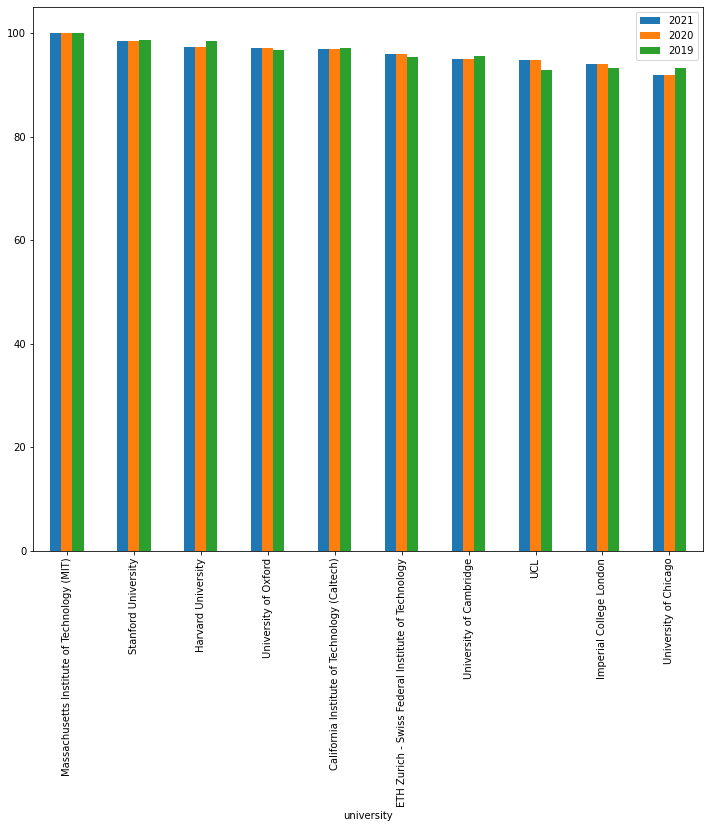

In [286]:
# Enter Code here
t2021.plot.bar('university',figsize=(12,10))

**Q13.** What do you observe from the plot above? Which university has remained consistent in their scores? Which have increased/decreased over the years? (3) <br> 
**Ans.** Type your answers here
Harvard University decreased 
ETH zurich increased 
University of Cambridge decreased 
UCL increased 
Imperial college increased
University of chicago increased
Stanford decreased 
University of Oxford increased 
MIT remained constant


Let's finally look at another useful tool to get an idea about how different variables are corelated to each other. We call it a **correlation matrix** <br>
A correlation matrix provides a correlation coefficient (a number between -1 and 1) that tells how strongly two variables are correlated. Values closer to -1 mean strong negative correlation whereas values closer to 1 mean strong positve correlation. Values closer to 0 show variables having no or little correlation. <br>
You can learn more about correlation matrices from here: https://www.statology.org/how-to-read-a-correlation-matrix/ <br> <br>

**Q14.** Plot a correlation matrix to see how each variable is correlated to another. You can use the data from 2021. (5) <br>
**Helpful link:** https://datatofish.com/correlation-matrix-pandas/

In [269]:
# Enter Code here
corr=t2021.corr()
print(corr)

          2021      2020      2019
2021  1.000000  1.000000  0.927179
2020  1.000000  1.000000  0.927179
2019  0.927179  0.927179  1.000000


**Q15.** Comment on the matrix you obtained in the previous part. (3)

**Ans.** Write your answer here.
the year 2020 and 2021 showed that the rankings did not change at all but in the difference in the year 2019 and 2020 is apparent that shows that universities that were already in the top 10 improved significantly and that improvement remained constant in the following year

Wow! This was a long ride. But I'm sure you have learnt alot through this assignment. Not only will this help you a lot in your project, but we have cleaned data extensively, looked at a variety of visualization techniques, analyzed the results we obtained. The most important part of the data science cycle is actually the collection, cleaning and EDA. Therefore, it is important to get a good grip on this technique. <br>
I hope you had fun, and now it's time to take a break :)  

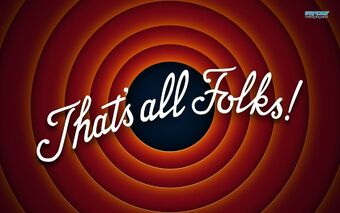